In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = web.DataReader('FB', data_source = 'yahoo', start='2019-07-01', end='2020-07-05') 

In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-26,233.089996,215.399994,232.639999,216.080002,76343900,216.080002
2020-06-29,220.750000,207.110001,209.750000,220.639999,58514300,220.639999
2020-06-30,227.500000,218.470001,220.589996,227.070007,33927100,227.070007
2020-07-01,239.000000,227.559998,228.500000,237.550003,43399700,237.550003
2020-07-02,240.000000,232.610001,239.000000,233.419998,30633600,233.419998


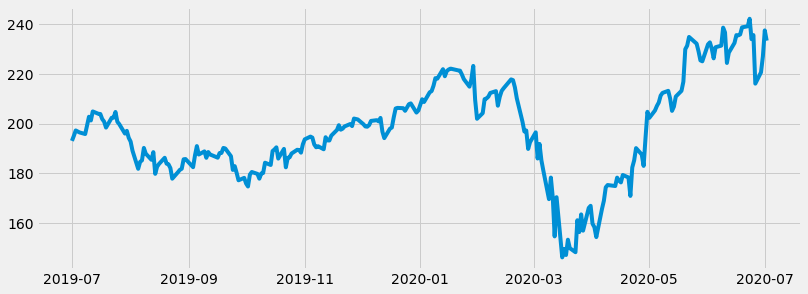

In [4]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, df['Close'], label = 'Close Price')
plt.show()

#### Using RSI or relative strength index 

In [5]:
delta = df['Adj Close'].diff(1)
delta

Date
2019-07-01          NaN
2019-07-02     2.000000
2019-07-03     2.199997
2019-07-05    -0.800003
2019-07-08    -0.639999
                ...    
2020-06-26   -19.599991
2020-06-29     4.559998
2020-06-30     6.430008
2020-07-01    10.479996
2020-07-02    -4.130005
Name: Adj Close, Length: 255, dtype: float64

In [6]:
delta = delta.dropna()
delta

Date
2019-07-02     2.000000
2019-07-03     2.199997
2019-07-05    -0.800003
2019-07-08    -0.639999
2019-07-09     3.450012
                ...    
2020-06-26   -19.599991
2020-06-29     4.559998
2020-06-30     6.430008
2020-07-01    10.479996
2020-07-02    -4.130005
Name: Adj Close, Length: 254, dtype: float64

In [7]:
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [8]:
period = 14
AVG_Gain = up.rolling(window = period).mean()
AVG_Loss = abs(down.rolling(window = period).mean())

In [9]:
RS = AVG_Gain/AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))

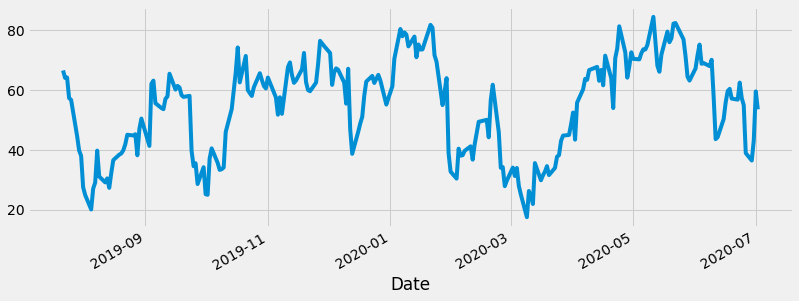

In [10]:
plt.figure(figsize = (12.2, 4.5))
RSI.plot()
plt.show()

In [12]:
new_df = pd.DataFrame()
new_df['Adj Close'] = df['Adj Close']
new_df['RSI'] = RSI
new_df.tail()

,Adj Close,RSI
Date,,
2020-06-26,216.080002,38.904987
2020-06-29,220.639999,36.408863
2020-06-30,227.070007,43.179900
2020-07-01,237.550003,59.507256
2020-07-02,233.419998,53.508262


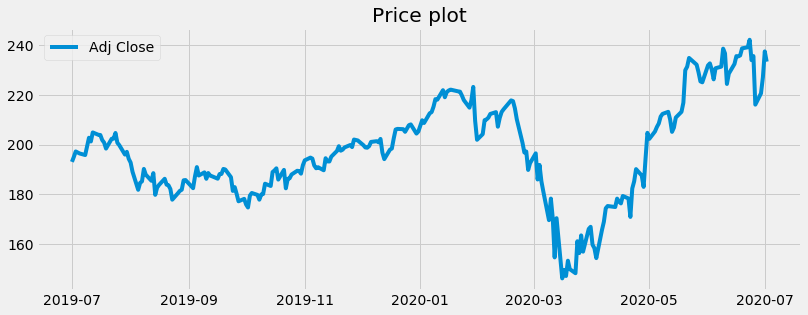

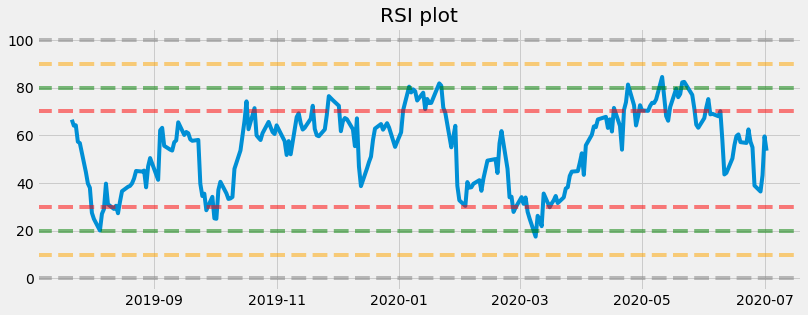

In [16]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Price plot')
plt.legend(new_df.columns.values)
plt.show()

plt.figure(figsize = (12.2, 4.5))
plt.title('RSI plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'grey')
plt.axhline(10, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(20, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(30, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(70, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(80, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(90, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'grey')

plt.show()